In [1]:
from chefboost import Chefboost as chef
import pandas as pd
import pyreadstat

df,meta = pyreadstat.read_sav("./telco_0507.sav")

In [2]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,logwire,lninc,custcat,churn,tenure_chaid,tenure_bin2,tenure_bin3,tenure_bin4,tenure_bin5,tenure_bin10
0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,...,NaN,4.158883,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
1,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,...,3.575151,4.912655,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
2,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,...,NaN,4.753590,3.0,0.0,6.0,2.0,3.0,4.0,5.0,10.0
3,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,...,NaN,3.496508,1.0,1.0,4.0,1.0,2.0,2.0,3.0,5.0
4,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,...,NaN,3.401197,3.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,10.0,39.0,0.0,0.0,27.0,3.0,0.0,0.0,1.0,...,NaN,3.295837,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0
996,1.0,7.0,34.0,0.0,2.0,22.0,5.0,5.0,0.0,1.0,...,NaN,3.091042,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
997,3.0,67.0,59.0,0.0,40.0,944.0,5.0,33.0,0.0,1.0,...,4.186620,6.850126,4.0,0.0,6.0,2.0,3.0,4.0,5.0,10.0
998,3.0,70.0,49.0,0.0,18.0,87.0,2.0,22.0,0.0,1.0,...,NaN,4.465908,3.0,0.0,6.0,2.0,3.0,4.0,5.0,10.0


In [3]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn', 'tenure_chaid', 'tenure_bin2', 'tenure_bin3',
       'tenure_bin4', 'tenure_bin5', 'tenure_bin10'],
      dtype='object')

In [4]:
print(df.isnull().sum())

region            0
tenure            0
age               0
marital           0
address           0
income            0
ed                0
employ            0
retire            0
gender            0
reside            0
tollfree          0
equip             0
callcard          0
wireless          0
longmon           0
tollmon           0
equipmon          0
cardmon           0
wiremon           0
longten           0
tollten           0
equipten          0
cardten           0
wireten           0
multline          0
voice             0
pager             0
internet          0
callid            0
callwait          0
forward           0
confer            0
ebill             0
loglong           0
logtoll         525
logequi         614
logcard         322
logwire         704
lninc             0
custcat           0
churn             0
tenure_chaid      0
tenure_bin2       0
tenure_bin3       0
tenure_bin4       0
tenure_bin5       0
tenure_bin10      0
dtype: int64


In [18]:
df.tenure_chaid.value_counts()

4.0    307
3.0    201
5.0    194
2.0    107
6.0     98
1.0     93
Name: tenure_chaid, dtype: int64

In [22]:
df.tenure_bin5.value_counts()

3.0    204
2.0    201
1.0    200
4.0    198
5.0    197
Name: tenure_bin5, dtype: int64

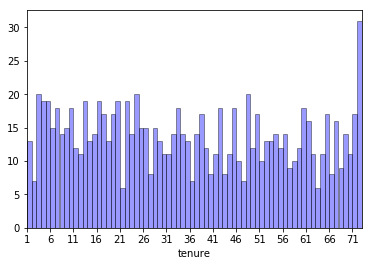

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.distplot(df.tenure, ax=ax, hist=True, kde=False, 
             bins=range(1,74,1), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1,73)
ax.set_xticks(range(1,73, 5))
plt.show()

In [9]:
df_nochurn = df[df.churn == 0]
df_nochurn.shape

(726, 48)

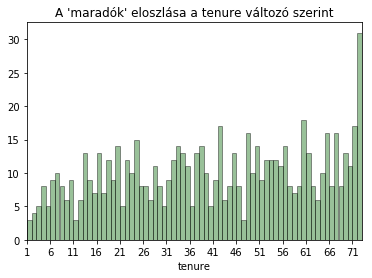

In [11]:
fig, ax = plt.subplots()
sns.distplot(df_nochurn.tenure, ax=ax, hist=True, kde=False, 
             bins=range(1,74,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1,73)
ax.set_xticks(range(1,73, 5))
plt.title("A 'maradók' eloszlása a tenure változó szerint")
plt.show()

In [12]:
df_churn = df[df.churn == 1]
df_churn.shape

(274, 48)

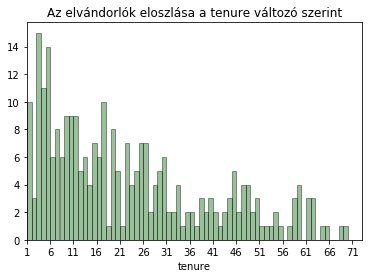

In [14]:
fig, ax = plt.subplots()
sns.distplot(df_churn.tenure, ax=ax, hist=True, kde=False, 
             bins=range(1,74,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1,73)
ax.set_xticks(range(1,73, 5))
plt.title("Az elvándorlók eloszlása a tenure változó szerint")
plt.show()

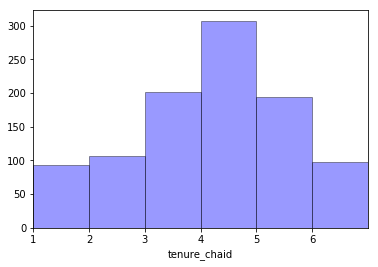

In [15]:
fig, ax = plt.subplots()
sns.distplot(df.tenure_chaid, ax=ax, hist=True, kde=False, 
             bins=range(1,8,1), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1,7)
ax.set_xticks(range(1,7))
plt.show()

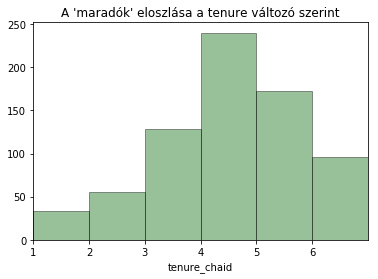

In [16]:
fig, ax = plt.subplots()
sns.distplot(df_nochurn.tenure_chaid, ax=ax, hist=True, kde=False, 
             bins=range(1,8,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1,7)
ax.set_xticks(range(1,7,1))
plt.title("A 'maradók' eloszlása a tenure változó szerint")
plt.show()

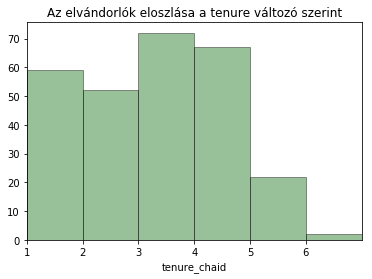

In [51]:
fig, ax = plt.subplots()
sns.distplot(df_churn.tenure_chaid, ax=ax, hist=True, kde=False, 
             bins=range(1,8,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1, 7)
ax.set_xticks(range(1,7,1))
plt.title("Az elvándorlók eloszlása a tenure változó szerint")
plt.show()

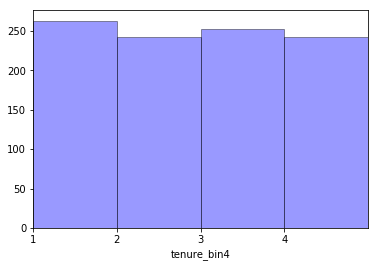

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.distplot(df.tenure_bin4, ax=ax, hist=True, kde=False, 
             bins=range(1,6,1), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1, 5)
ax.set_xticks(range(1, 5))
plt.show()

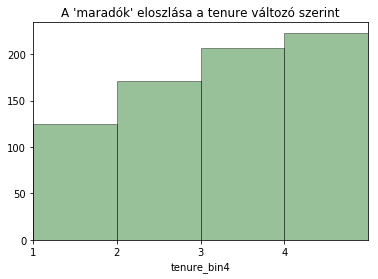

In [24]:
fig, ax = plt.subplots()
sns.distplot(df_nochurn.tenure_bin4, ax=ax, hist=True, kde=False, 
             bins=range(1,6,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1, 5)
ax.set_xticks(range(1, 5, 1))
plt.title("A 'maradók' eloszlása a tenure változó szerint")
plt.show()

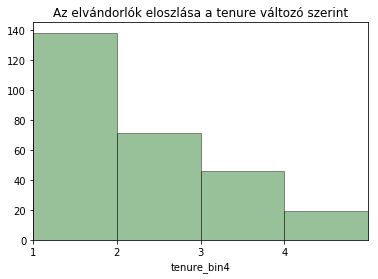

In [26]:
fig, ax = plt.subplots()
sns.distplot(df_churn.tenure_bin4, ax=ax, hist=True, kde=False, 
             bins=range(1,6,1), color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
ax.set_xlim(1, 5)
ax.set_xticks(range(1, 5, 1))
plt.title("Az elvándorlók eloszlása a tenure változó szerint")
plt.show()

In [31]:
import statsmodels.formula.api as smf
import seaborn as sns

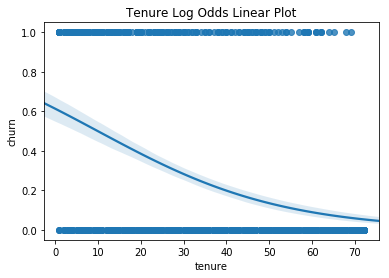

In [32]:
tenure = sns.regplot(x= 'tenure', y= 'churn', data= df, logistic= True).set_title("Tenure Log Odds Linear Plot")

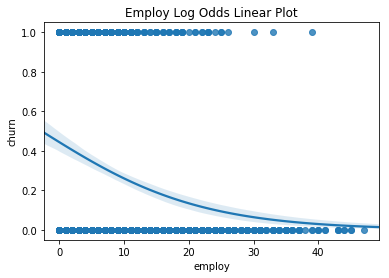

In [64]:
employ = sns.regplot(x= 'employ', y= 'churn', data= df, logistic= True).set_title("Employ Log Odds Linear Plot")

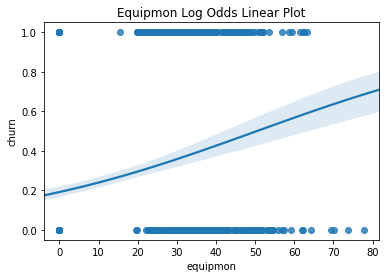

In [34]:
equipmon = sns.regplot(x= 'equipmon', y= 'churn', data= df, logistic= True).set_title("Equipmon Log Odds Linear Plot")

In [36]:
df_variables = df[["equipmon","employ", "tenure"]]
df_variables

,equipmon,employ,tenure
0,0.00,5.0,13.0
1,0.00,5.0,11.0
2,0.00,29.0,68.0
3,0.00,0.0,33.0
4,0.00,2.0,23.0
...,...,...,...
995,29.05,0.0,10.0
996,25.60,5.0,7.0
997,54.55,33.0,67.0
998,0.00,22.0,70.0


In [37]:
#df_variables['tenure_chaid'] = df_variables['tenure_chaid'].astype('category')
#df_variables = pd.get_dummies(df_variables)

In [38]:
df_variables.corr()

,equipmon,employ,tenure
equipmon,1.000000,-0.161108,-0.060356
employ,-0.161108,1.000000,0.520288
tenure,-0.060356,0.520288,1.000000


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


target = df['churn']
features = df[['employ', 'equipmon', 'tenure']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)

In [41]:
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[250  37]
 [ 63  50]]


In [46]:
total=sum(sum(confusion_matrix))
#####from confusion matrix calculate accuracy
accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.75
Sensitivity :  0.8710801393728222
Specificity :  0.4424778761061947


In [49]:
target_ch = df['churn']
features_ch = df[['employ', 'equipmon', 'tenure_chaid']]
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(features_ch, target_ch, test_size=0.4, random_state=10)
logreg_ch = LogisticRegression()
logreg_ch.fit(X_train_ch, y_train_ch)

LogisticRegression()

In [76]:
y_pred_ch = logreg_ch.predict(X_test_ch)

In [77]:
target_con = df['churn']
features_con = df[['employ', 'equipmon', 'tenure']]
X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(features_con, target_con, test_size=0.4, random_state=10)
logreg_con = LogisticRegression()
logreg_con.fit(X_train_con, y_train_con)
y_pred_con = logreg_con.predict(X_test_con)

In [79]:
target_bin2 = df['churn']
features_bin2 = df[['employ', 'equipmon', 'tenure_bin2']]
X_train_bin2, X_test_bin2, y_train_bin2, y_test_bin2 = train_test_split(features_bin2, target_bin2, test_size=0.4, random_state=10)
logreg_bin2 = LogisticRegression()
logreg_bin2.fit(X_train_bin2, y_train_bin2)
y_pred_bin2 = logreg_bin2.predict(X_test_bin2)

In [81]:
target_bin3 = df['churn']
features_bin3 = df[['employ', 'equipmon', 'tenure_bin3']]
X_train_bin3, X_test_bin3, y_train_bin3, y_test_bin3 = train_test_split(features_bin3, target_bin3, test_size=0.4, random_state=10)
logreg_bin3 = LogisticRegression()
logreg_bin3.fit(X_train_bin3, y_train_bin3)
y_pred_bin3 = logreg_bin3.predict(X_test_bin3)

In [82]:
target_bin4 = df['churn']
features_bin4 = df[['employ', 'equipmon', 'tenure_bin4']]
X_train_bin4, X_test_bin4, y_train_bin4, y_test_bin4 = train_test_split(features_bin4, target_bin4, test_size=0.4, random_state=10)
logreg_bin4 = LogisticRegression()
logreg_bin4.fit(X_train_bin4, y_train_bin4)
y_pred_bin4 = logreg_bin4.predict(X_test_bin4)

In [83]:
target_bin5 = df['churn']
features_bin5 = df[['employ', 'equipmon', 'tenure_bin5']]
X_train_bin5, X_test_bin5, y_train_bin5, y_test_bin5 = train_test_split(features_bin5, target_bin5, test_size=0.4, random_state=10)
logreg_bin5 = LogisticRegression()
logreg_bin5.fit(X_train_bin5, y_train_bin5)
y_pred_bin5 = logreg_bin5.predict(X_test_bin5)

No Skill: ROC AUC=0.500
Logistic_CHAID: ROC AUC=0.768
Logistic_continuous: ROC AUC=0.762
Logistic_median: ROC AUC=0.726
Logistic_tercilis: ROC AUC=0.756
Logistic_kvartilis: ROC AUC=0.748
Logistic_kvintilis: ROC AUC=0.756


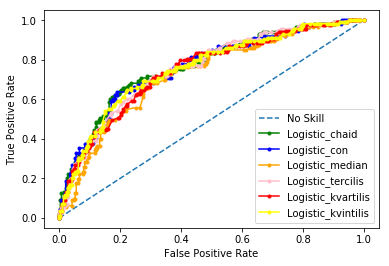

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs_ch = logreg_ch.predict_proba(X_test_ch)
lr_probs_con = logreg_con.predict_proba(X_test_con)
lr_probs_bin2 = logreg_bin2.predict_proba(X_test_bin2)
lr_probs_bin3 = logreg_bin3.predict_proba(X_test_bin3)
lr_probs_bin4 = logreg_bin4.predict_proba(X_test_bin4)
lr_probs_bin5 = logreg_bin5.predict_proba(X_test_bin5)


# keep probabilities for the positive outcome only
lr_probs_ch = lr_probs_ch[:, 1]
lr_probs_con = lr_probs_con[:, 1]
lr_probs_bin2 = lr_probs_bin2[:, 1]
lr_probs_bin3 = lr_probs_bin3[:, 1]
lr_probs_bin4 = lr_probs_bin4[:, 1]
lr_probs_bin5 = lr_probs_bin5[:, 1]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc_ch = roc_auc_score(y_test_ch, lr_probs_ch)
lr_auc_con = roc_auc_score(y_test_con, lr_probs_con)
lr_auc_bin2 = roc_auc_score(y_test_bin2, lr_probs_bin2)
lr_auc_bin3 = roc_auc_score(y_test_bin3, lr_probs_bin3)
lr_auc_bin4 = roc_auc_score(y_test_bin4, lr_probs_bin4)
lr_auc_bin5 = roc_auc_score(y_test_bin5, lr_probs_bin5)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic_CHAID: ROC AUC=%.3f' % (lr_auc_ch))
print('Logistic_continuous: ROC AUC=%.3f' % (lr_auc_con))
print('Logistic_median: ROC AUC=%.3f' % (lr_auc_bin2))
print('Logistic_tercilis: ROC AUC=%.3f' % (lr_auc_bin3))
print('Logistic_kvartilis: ROC AUC=%.3f' % (lr_auc_bin4))
print('Logistic_kvintilis: ROC AUC=%.3f' % (lr_auc_bin5))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr_ch, lr_tpr_ch, _ = roc_curve(y_test_ch, lr_probs_ch)
lr_fpr_con, lr_tpr_con, _ = roc_curve(y_test_con, lr_probs_con)
lr_fpr_bin2, lr_tpr_bin2, _ = roc_curve(y_test_bin2, lr_probs_bin2)
lr_fpr_bin3, lr_tpr_bin3, _ = roc_curve(y_test_bin3, lr_probs_bin3)
lr_fpr_bin4, lr_tpr_bin4, _ = roc_curve(y_test_bin4, lr_probs_bin4)
lr_fpr_bin5, lr_tpr_bin5, _ = roc_curve(y_test_bin5, lr_probs_bin5)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr_ch, lr_tpr_ch, marker='.', label='Logistic_chaid', color = "green")
pyplot.plot(lr_fpr_con, lr_tpr_con, marker='.', label='Logistic_con', color = "blue")
pyplot.plot(lr_fpr_bin2, lr_tpr_bin2, marker='.', label='Logistic_median', color = "orange")
pyplot.plot(lr_fpr_bin3, lr_tpr_bin3, marker='.', label='Logistic_tercilis', color = "pink")
pyplot.plot(lr_fpr_bin4, lr_tpr_bin4, marker='.', label='Logistic_kvartilis', color = "red")
pyplot.plot(lr_fpr_bin5, lr_tpr_bin5, marker='.', label='Logistic_kvintilis', color = "yellow")



# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()